# Análise de Dados de Startups Unicórnio



- Pacotes python

In [61]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np


- Configuração

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

- Carregando o dataset

In [4]:
FILE = '/content/Global-Unicorn.csv'
df = pd.read_csv(FILE)

- Explorando os dados

In [10]:
display(df.head(10))
display(df.tail())
display(df.info())
display(df.isnull().sum())

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,ByteDance,225.0,07-04-2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,137.0,01-12-2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,03-07-2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,50.0,23-01-2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,08-01-2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Revolut,33.0,26-04-2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
6,Epic Games,31.5,26-10-2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"
7,Databricks,31.0,05-02-2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Fanatics,31.0,06-06-2012,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."
9,Chime,25.0,05-03-2019,United States,San Francisco,Fintech,"Forerunner Ventures, Crosslink Capital, Homebrew"


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
1201,LeadSquared,1.0,21-06-2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1202,FourKites,1.0,21-06-2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1203,VulcanForms,1.0,05-07-2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1204,SingleStore,1.0,12-07-2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"
1205,Unstoppable Domains,1.0,27-07-2022,United States,Las Vegas,Internet software & services,"Boost VC, Draper Associates, Gaingels"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1206 non-null   object 
 1   Valuation ($B)    1206 non-null   float64
 2   Date Joined       1206 non-null   object 
 3   Country           1206 non-null   object 
 4   City              1188 non-null   object 
 5   Industry          1206 non-null   object 
 6   Select Investors  1205 non-null   object 
dtypes: float64(1), object(6)
memory usage: 66.1+ KB


None

,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,18
Industry,0
Select Investors,1


# Tratamento

- Deletando valores nulos

In [5]:
df.dropna(inplace=True)

- Renomeando colunas

In [7]:


novos_nomes = {
    'Company': 'Empresa',
    'Valuation ($B)': 'Valuation',
    'Date Joined': 'Data',
    'Country': 'País',
    'City': 'Cidade',
    'Industry': 'Indústria',
    'Select Investors': 'Investidores'
}

df.rename(columns=novos_nomes, inplace=True)
df.columns

Index(['Empresa', 'Valuation', 'Data', 'País', 'Cidade', 'Indústria',
       'Investidores'],
      dtype='object')

Coluna de data

In [9]:
df['Data']

,Data
0,07-04-2017
1,01-12-2012
2,03-07-2018
3,23-01-2014
4,08-01-2018
5,26-04-2018
6,26-10-2018
7,05-02-2019
8,06-06-2012
9,05-03-2019


In [10]:
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')
df['Data'].dtype

dtype('<M8[ns]')

# Adicionando dados geográficos

- Criando uma tabela de países

In [15]:
country = df['País'].drop_duplicates()

- Verificando os países

In [16]:
country.values

array(['China', 'United States', 'Australia', 'United Kingdom',
       'Indonesia', 'Germany', 'India', 'Hong Kong', 'Israel',
       'Seychelles', 'Sweden', 'Turkey', 'Mexico', 'Estonia', 'Canada',
       'South Korea', 'Netherlands', 'France', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'Denmark', 'Switzerland', 'Lithuania',
       'Austria', 'Ireland', 'Vietnam', 'United Arab Emirates',
       'Argentina', 'Spain', 'Greece', 'Japan', 'Luxembourg', 'Nigeria',
       'Croatia', 'Senegal', 'Malaysia', 'Bermuda', 'Norway',
       'South Africa', 'Ecuador', 'Chile', 'Thailand', 'Czech Republic',
       'Egypt', 'Liechtenstein', 'Italy', 'Philippines', 'London'],
      dtype=object)

 - Latitude

In [20]:
lat = {
    'China': 35.8617,
    'United States': 37.0902,
    'Australia': -25.2744,
    'United Kingdom': 55.3781,
    'Indonesia': -0.7893,
    'Germany': 51.1657,
    'India': 20.5937,
    'Hong Kong': 22.3193,
    'Israel': 31.0461,
    'Seychelles': -4.6796,
    'Sweden': 60.1282,
    'Turkey': 38.9637,
    'Mexico': 23.6345,
    'Estonia': 58.5953,
    'Canada': 56.1304,
    'South Korea': 35.9078,
    'Netherlands': 52.1326,
    'France': 46.2276,
    'Finland': 61.9241,
    'Colombia': 4.5709,
    'Belgium': 50.5039,
    'Brazil': -14.2350,
    'Denmark': 56.2639,
    'Switzerland': 46.8182,
    'Lithuania': 55.1694,
    'Austria': 47.5162,
    'Ireland': 53.1424,
    'Vietnam': 14.0583,
    'United Arab Emirates': 23.4241,
    'Argentina': -38.4161,
    'Spain': 40.4637,
    'Greece': 39.0742,
    'Japan': 36.2048,
    'Luxembourg': 49.8153,
    'Nigeria': 9.0820,
    'Croatia': 45.1000,
    'Senegal': 14.4974,
    'Malaysia': 4.2105,
    'Bermuda': 32.3078,
    'Norway': 60.4720,
    'South Africa': -30.5595,
    'Ecuador': -1.8312,
    'Chile': -35.6751,
    'Thailand': 15.8700,
    'Czech Republic': 49.8175,
    'Egypt': 26.8206,
    'Liechtenstein': 47.1660,
    'Italy': 41.8719,
    'Philippines': 12.8797,
    'London': 51.5074  # Latitude da cidade de Londres
}


In [31]:
df['Lat'] = df['País'].map(lat)

df[['País', 'Lat']].head(10)

,País,Lat
0,China,35.8617
1,United States,37.0902
2,China,35.8617
3,United States,37.0902
4,Australia,-25.2744
5,United Kingdom,55.3781
6,United States,37.0902
7,United States,37.0902
8,United States,37.0902
9,United States,37.0902


- Longitude

In [32]:
lng = {
    'China': 104.1954,
    'United States': -95.7129,
    'Australia': 133.7751,
    'United Kingdom': -3.4360,
    'Indonesia': 113.9213,
    'Germany': 10.4515,
    'India': 78.9629,
    'Hong Kong': 114.1694,
    'Israel': 34.8516,
    'Seychelles': 55.4920,
    'Sweden': 18.6435,
    'Turkey': 35.2433,
    'Mexico': -102.5528,
    'Estonia': 25.0136,
    'Canada': -106.3468,
    'South Korea': 127.7669,
    'Netherlands': 5.2913,
    'France': 2.2137,
    'Finland': 25.7482,
    'Colombia': -74.2973,
    'Belgium': 4.4699,
    'Brazil': -51.9253,
    'Denmark': 9.5018,
    'Switzerland': 8.2275,
    'Lithuania': 23.8813,
    'Austria': 14.5501,
    'Ireland': -7.6921,
    'Vietnam': 108.2772,
    'United Arab Emirates': 53.8478,
    'Argentina': -63.6167,
    'Spain': -3.7492,
    'Greece': 21.8243,
    'Japan': 138.2529,
    'Luxembourg': 6.1296,
    'Nigeria': 8.6753,
    'Croatia': 15.2000,
    'Senegal': -14.4524,
    'Malaysia': 101.9758,
    'Bermuda': -64.7505,
    'Norway': 8.4689,
    'South Africa': 22.9375,
    'Ecuador': -78.1834,
    'Chile': -71.5430,
    'Thailand': 100.9925,
    'Czech Republic': 15.4729,
    'Egypt': 30.8025,
    'Liechtenstein': 9.5554,
    'Italy': 12.5674,
    'Philippines': 121.7740,
    'London': -0.1276  # Longitude da cidade de Londres
}


In [33]:
df['Lng'] = df['País'].map(lng)

df[['País', 'Lng']].head(10)

,País,Lng
0,China,104.1954
1,United States,-95.7129
2,China,104.1954
3,United States,-95.7129
4,Australia,133.7751
5,United Kingdom,-3.4360
6,United States,-95.7129
7,United States,-95.7129
8,United States,-95.7129
9,United States,-95.7129


- Adicionando os continentes

In [34]:
continent = {
    'China': 'Asia',
    'United States': 'North America',
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'Indonesia': 'Asia',
    'Germany': 'Europe',
    'India': 'Asia',
    'Hong Kong': 'Asia',
    'Israel': 'Asia',
    'Seychelles': 'Africa',
    'Sweden': 'Europe',
    'Turkey': 'Asia',  # Geopolitically split, but majority in Asia
    'Mexico': 'North America',
    'Estonia': 'Europe',
    'Canada': 'North America',
    'South Korea': 'Asia',
    'Netherlands': 'Europe',
    'France': 'Europe',
    'Finland': 'Europe',
    'Colombia': 'South America',
    'Belgium': 'Europe',
    'Brazil': 'South America',
    'Denmark': 'Europe',
    'Switzerland': 'Europe',
    'Lithuania': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Vietnam': 'Asia',
    'United Arab Emirates': 'Asia',
    'Argentina': 'South America',
    'Spain': 'Europe',
    'Greece': 'Europe',
    'Japan': 'Asia',
    'Luxembourg': 'Europe',
    'Nigeria': 'Africa',
    'Croatia': 'Europe',
    'Senegal': 'Africa',
    'Malaysia': 'Asia',
    'Bermuda': 'North America',
    'Norway': 'Europe',
    'South Africa': 'Africa',
    'Ecuador': 'South America',
    'Chile': 'South America',
    'Thailand': 'Asia',
    'Czech Republic': 'Europe',
    'Egypt': 'Africa',
    'Liechtenstein': 'Europe',
    'Italy': 'Europe',
    'Philippines': 'Asia',
    'London': 'Europe'  # Refere à cidade, mas está na Europa
}


In [35]:
df['Continente' ] = df['País'].map(continent)

df[['País', 'Continente']].head(10)

,País,Continente
0,China,Asia
1,United States,North America
2,China,Asia
3,United States,North America
4,Australia,Oceania
5,United Kingdom,Europe
6,United States,North America
7,United States,North America
8,United States,North America
9,United States,North America


- Exportando

In [36]:
df.to_csv('dataset_global_unicorn.csv', index=False)

# Analisando a série histórica do valuation de startups unicórnio



In [41]:
serie = df[['Data', 'Valuation']].set_index('Data').sort_values('Data', ascending=True)

In [44]:

fig = px.line(
    serie,
    y='Valuation',
    title='Valuation ao longo dos anos'
)

fig.update_traces(line=dict(color='limegreen'))
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=24),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()

- Valuation ao longo dos anos por continente

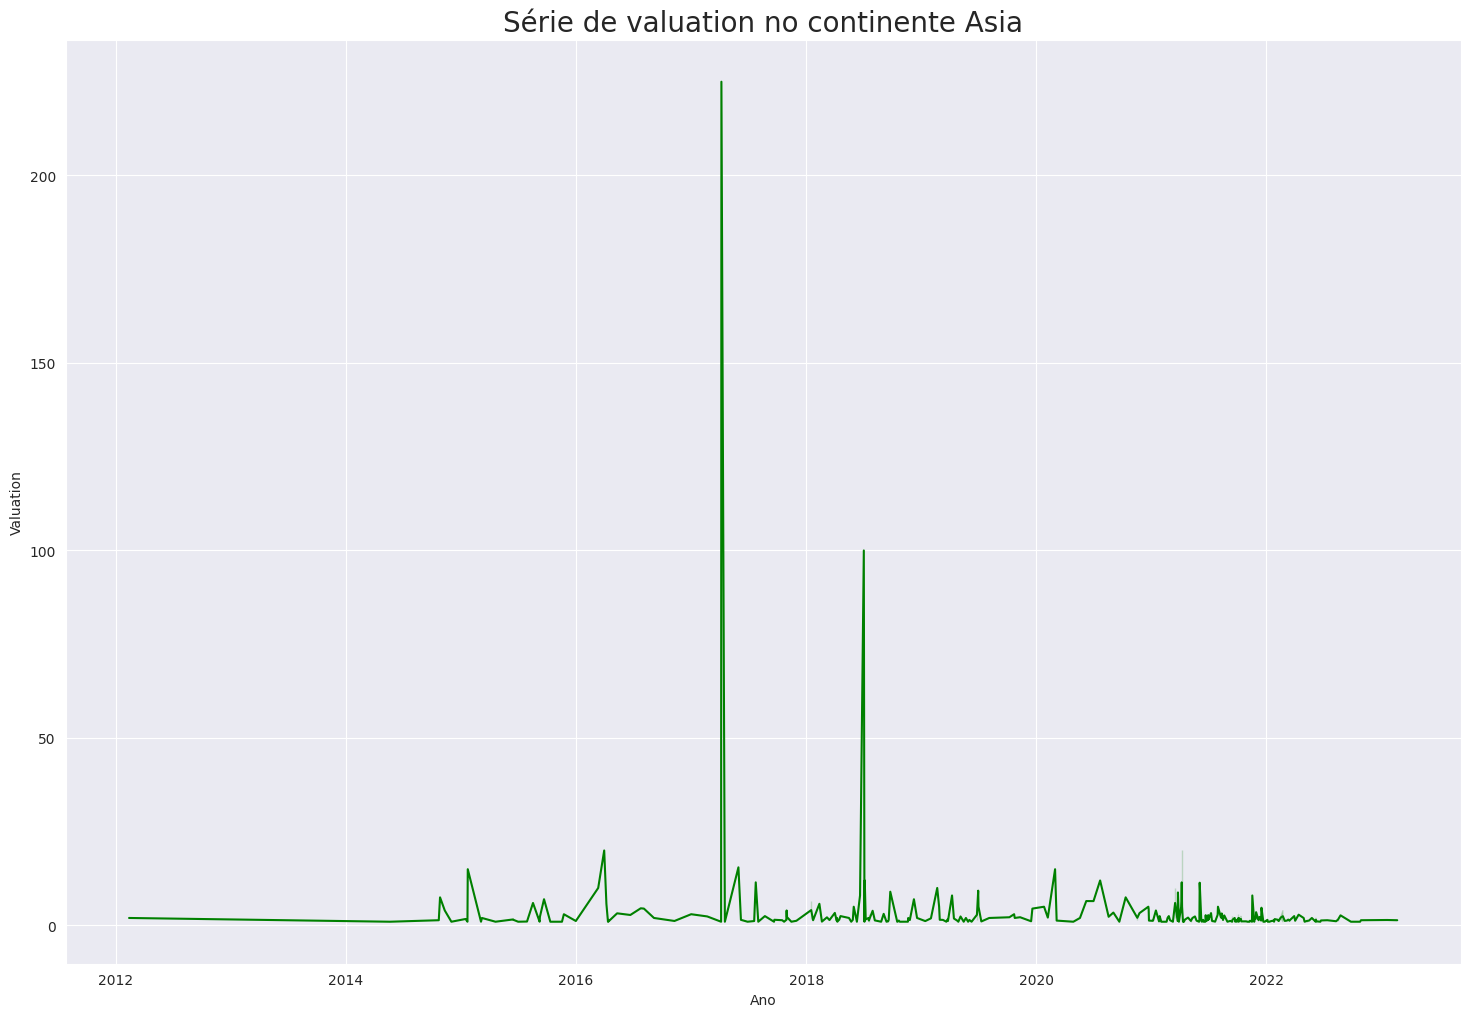

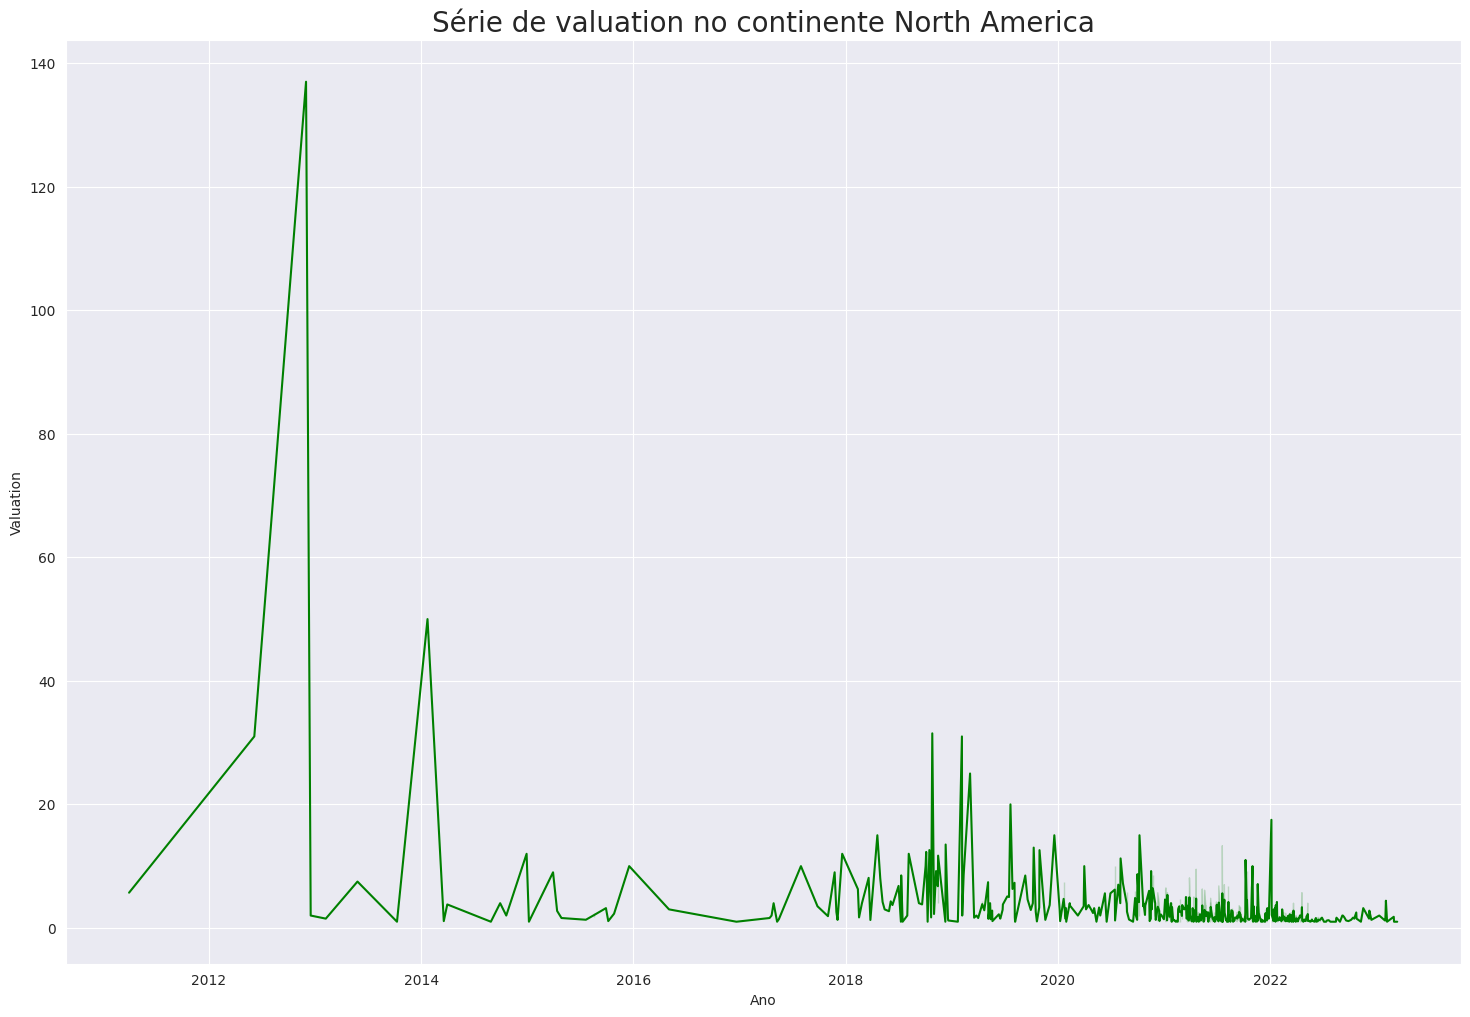

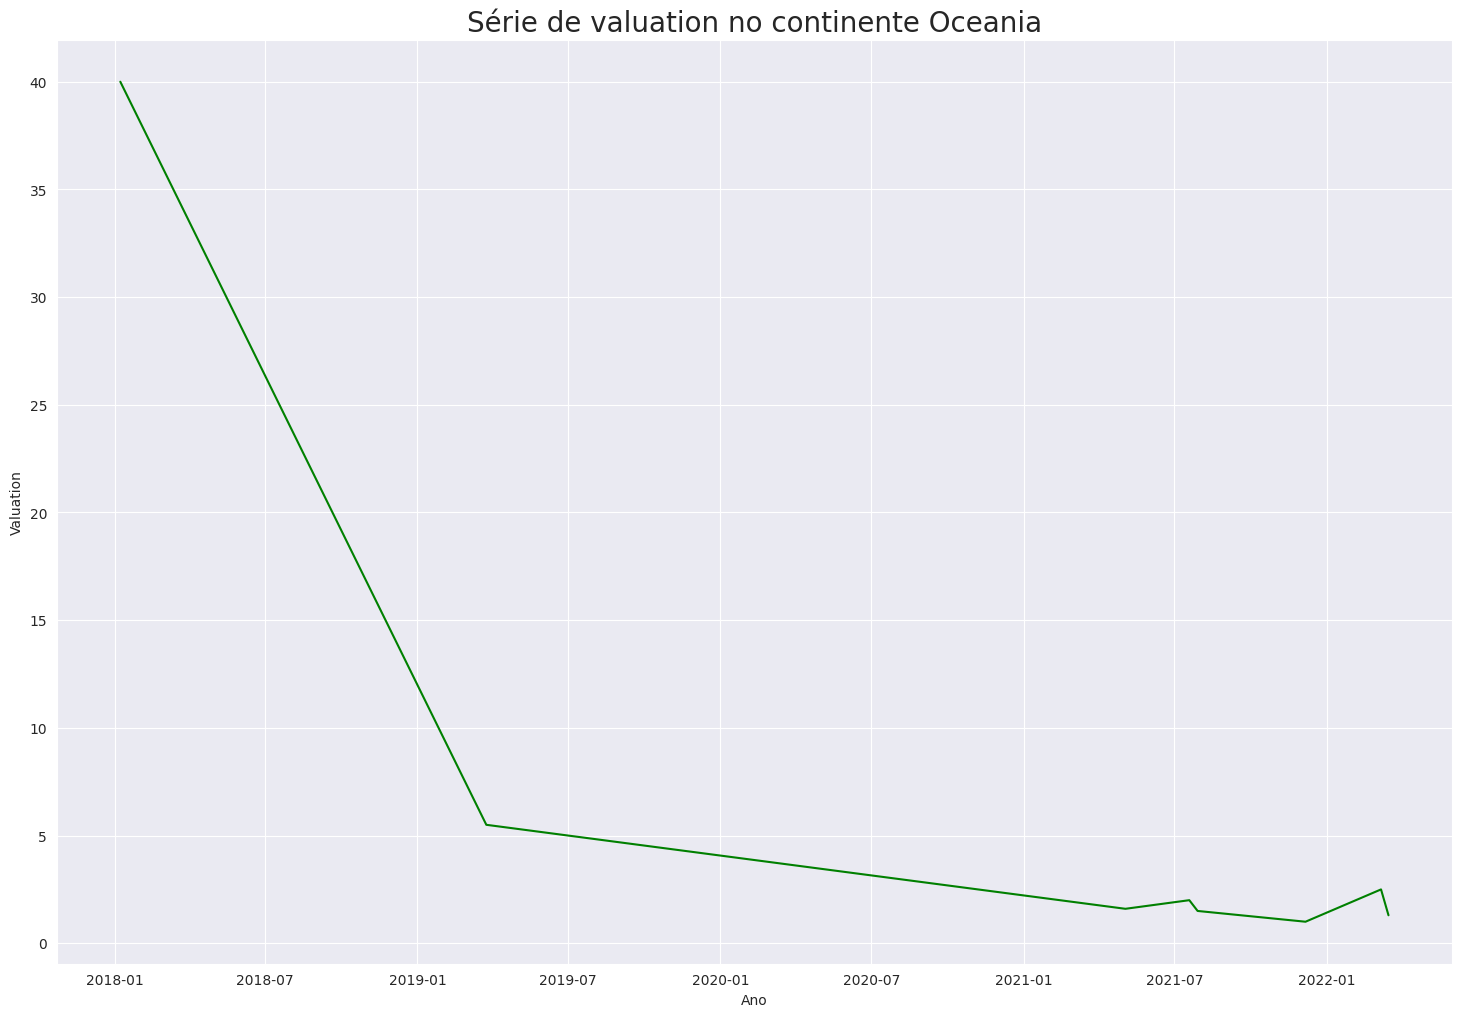

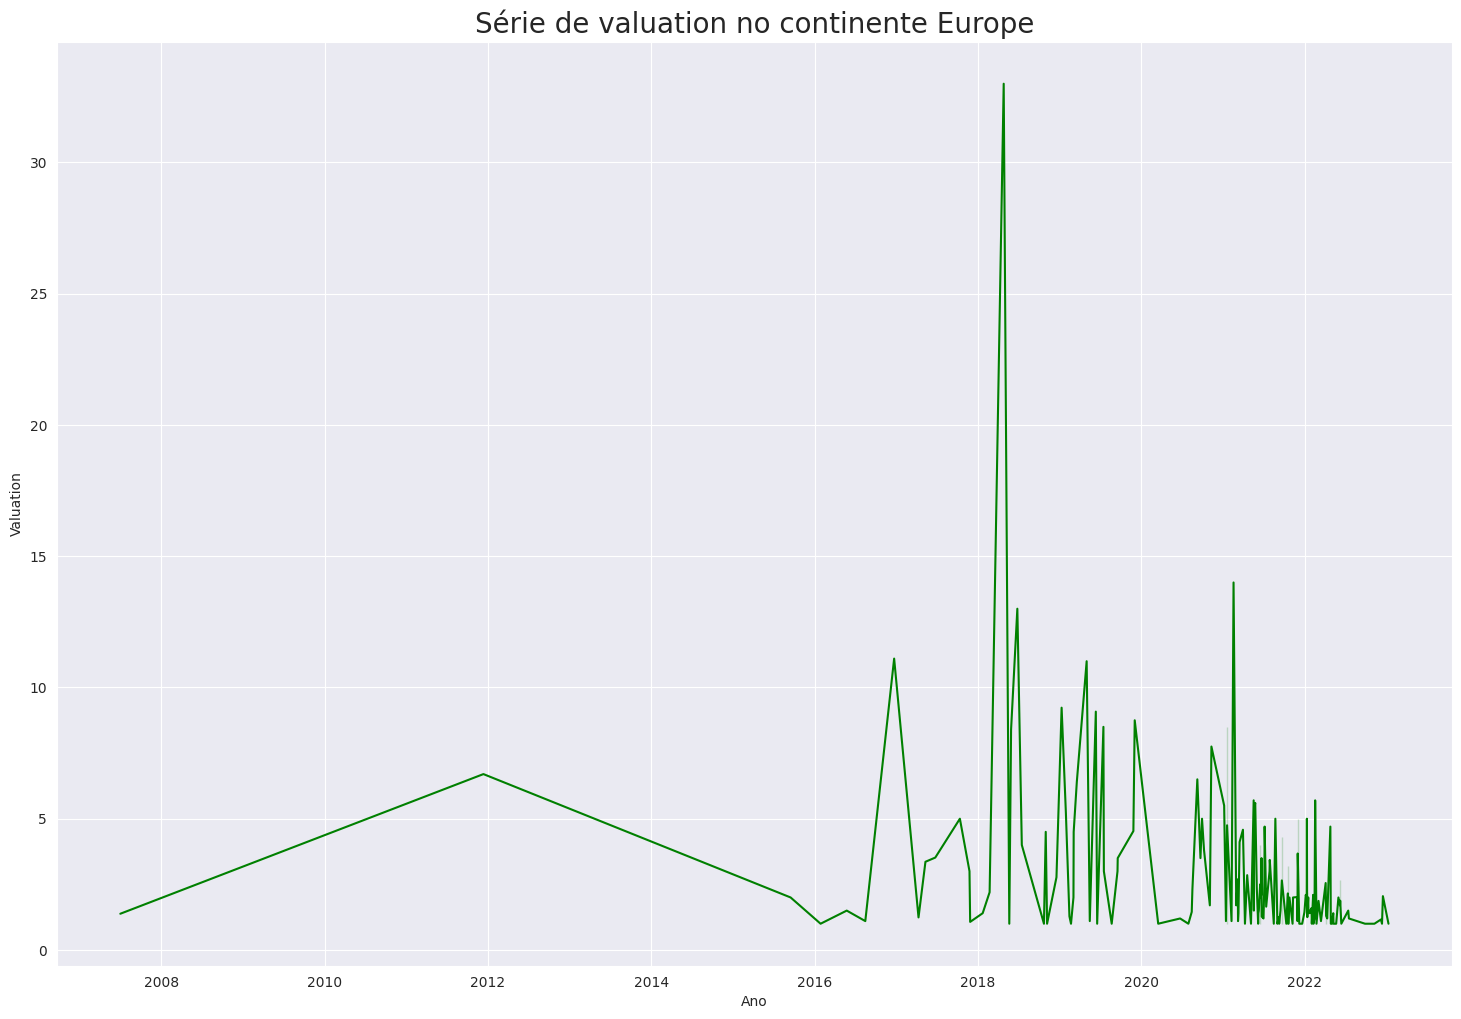

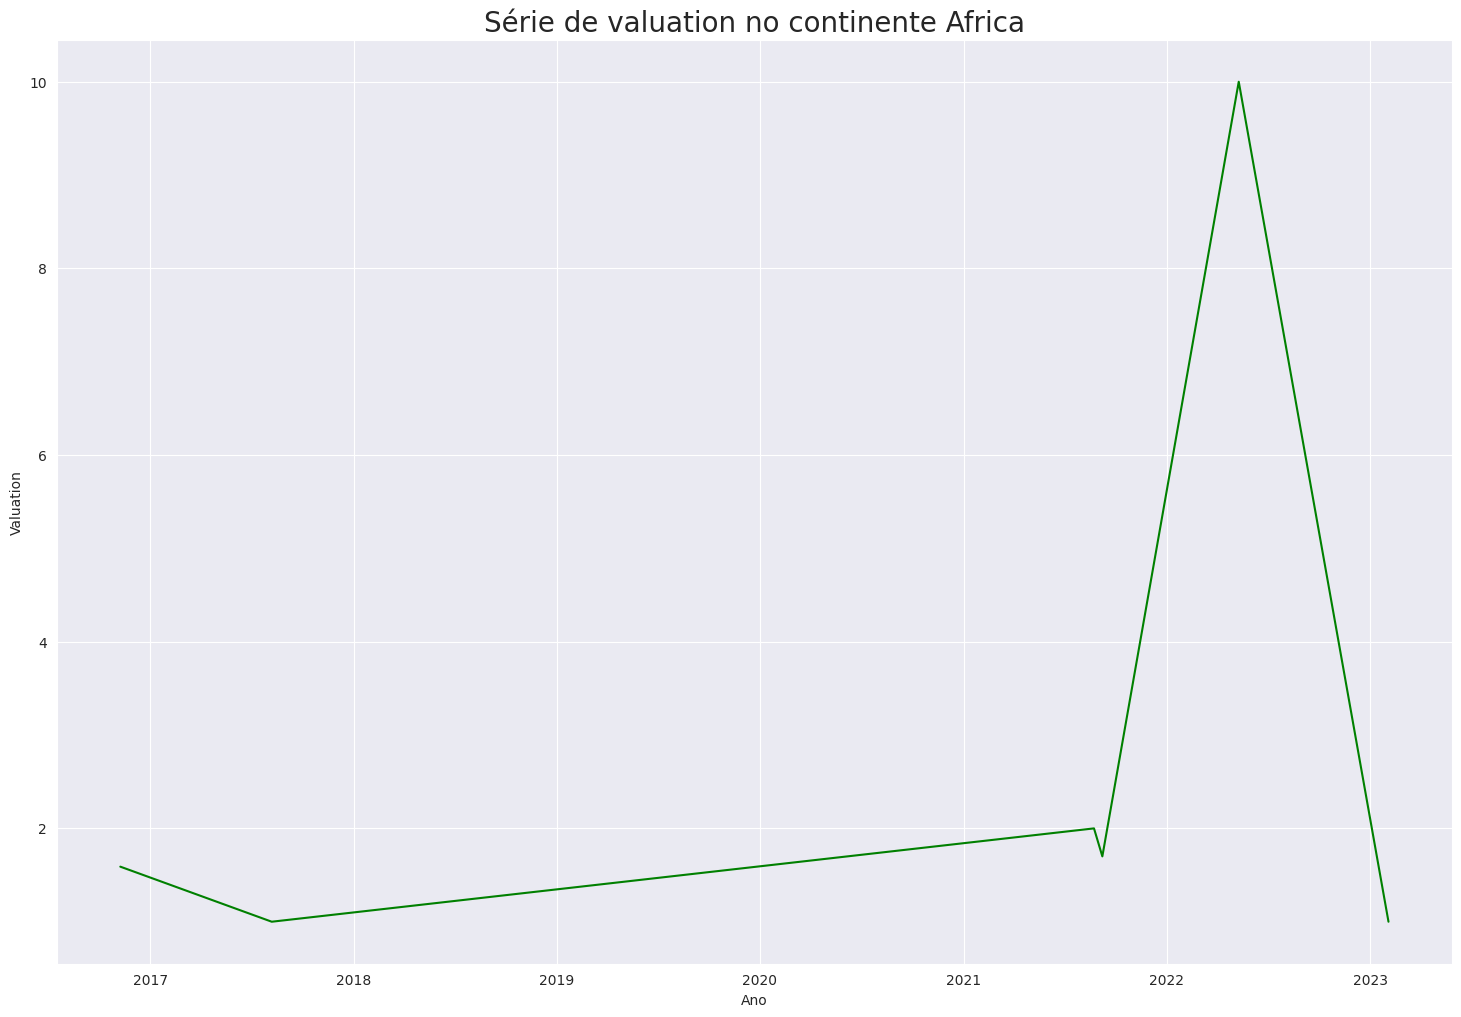

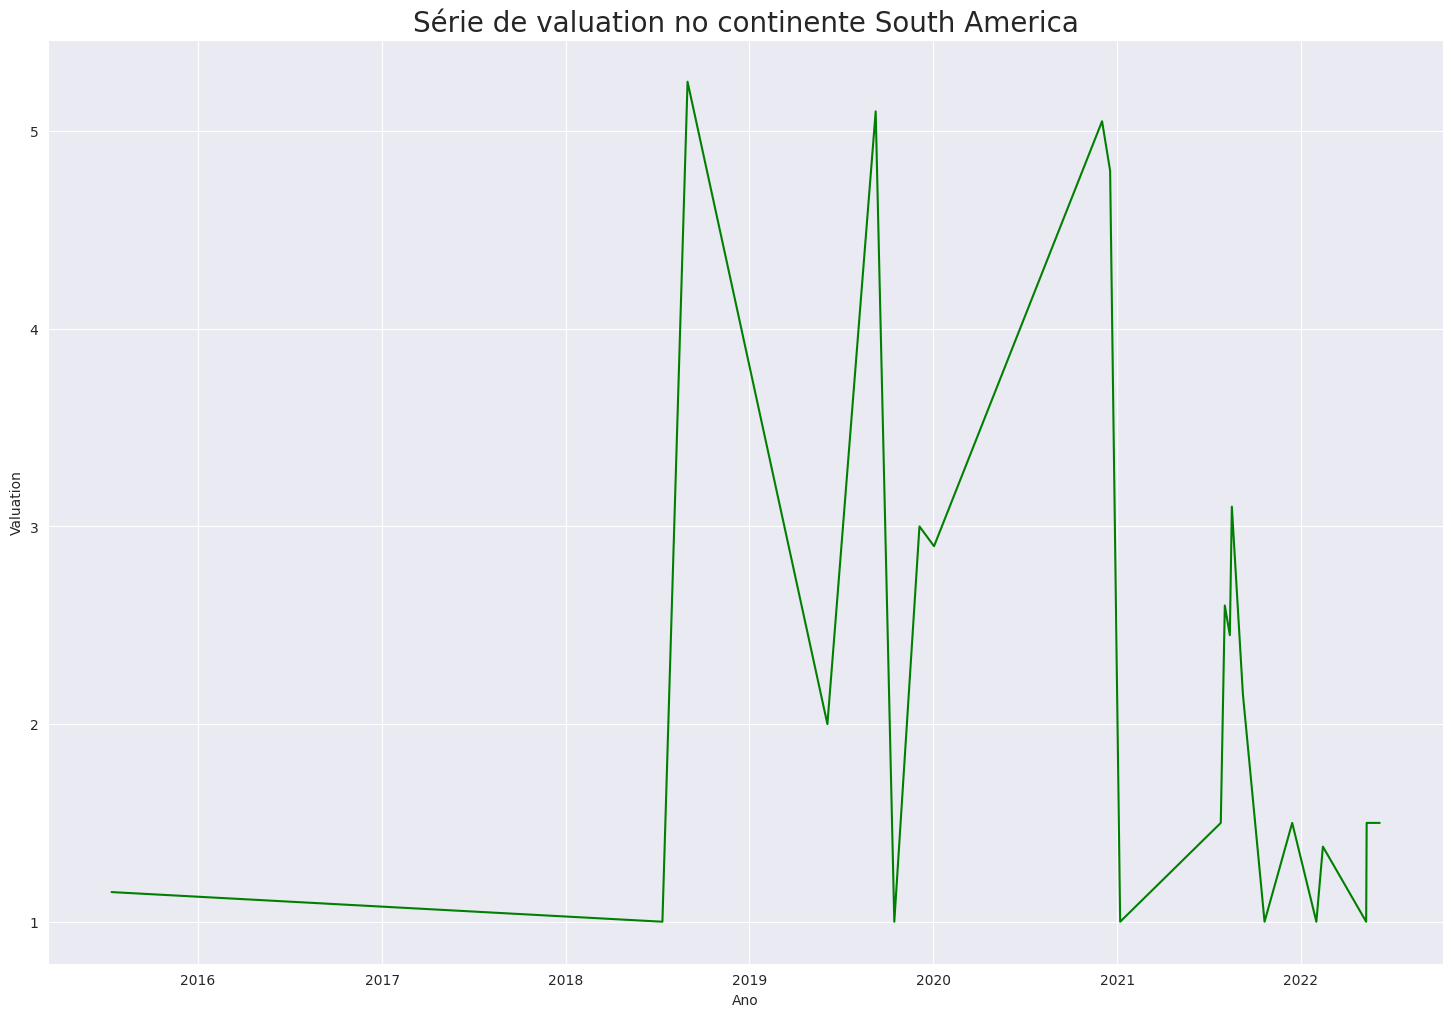

In [81]:
continent = df['Continente'].drop_duplicates().to_list()

for value in continent:
  plt.figure(figsize=(18, 12))
  sns.set_style('darkgrid')
  sns.lineplot(data=df[df['Continente'] == value], x='Data', y='Valuation', color='green')
  plt.title(f'Série de valuation no continente {value}', fontsize=20)
  plt.xlabel('Ano')
  plt.ylabel('Valuation')
  plt.show()

- Valuation por continente

In [49]:
valuation_continet = df.groupby('Continente')['Valuation'].sum().sort_values(ascending=False)

In [50]:
fig = px.bar(
    valuation_continet,
    y=valuation_continet.index,
    x=valuation_continet.values,
    title='Valuation por continente'
)

fig.update_traces(marker_color='limegreen')
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=24),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

display(valuation_continet)
fig.show()

,Valuation
Continente,
North America,2119.58
Asia,1096.81
Europe,466.15
Oceania,55.40
South America,52.93
Africa,17.29


🔍 **Análise**  
O mercado global de startups unicórnio está concentrado nos eixos América do Norte, Ásia e Europa, com a liderança global em avaliação pertencendo ao continente norte-americano.

✅ **Conclusão**  
A predominância da América do Norte em valuation reforça seu papel como epicentro da inovação tecnológica e do capital de risco.


- Países

- Ranking de valuation dos países

In [54]:
ranking = df.groupby('País')['Valuation'].sum().sort_values(ascending=False).head(20)

In [56]:
fig = px.bar(
    ranking,
    x=ranking.values,
    y=ranking.index,
    title='Ranking de 20 países'
)

fig.update_traces(marker_color='darkblue')  # Cor das barras
fig.update_layout(
    plot_bgcolor='black',       # Fundo do gráfico
    paper_bgcolor='black',      # Fundo da área total
    font=dict(color='white'),   # Cor da fonte
    title_font=dict(size=24),   # Tamanho do título
    xaxis=dict(showgrid=False), # Remove linhas de grade
    yaxis=dict(showgrid=False)
)

display(ranking)
fig.show()

,Valuation
País,
United States,2049.05
China,734.73
India,192.53
United Kingdom,180.16
Germany,80.93
France,59.58
Australia,55.40
Israel,54.42
Canada,50.23


🔍 **Análise**  
A liderança global em valuation de startups unicórnio é dos Estados Unidos, seguido pela China. Na Europa, os principais hubs do mercado estão concentrados na Alemanha, no Reino Unido e na França.



# Mapa global

In [60]:

data_map = df[['Lng', 'Lat', 'País', 'Valuation']]

mapa_unicornios = folium.Map(
    location=[30, 0],
    zoom_start=2,
    tiles='CartoDB dark_matter'
)

for index, row in data_map.iterrows():
    if pd.notna(row['Lat']) and pd.notna(row['Lng']):

        raio = row['Valuation'] / 10

        folium.CircleMarker(
            location=[row['Lat'], row['Lng']],
            radius=raio,
            popup=f"País: {row['País']}<br>Avaliação: ${row['Valuation']}B",
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(mapa_unicornios)

mapa_unicornios

In [64]:

data_map = df[['Lng', 'Lat', 'País', 'Valuation']]

valuation_by_country = data_map.groupby('País')['Valuation'].sum().reset_index()

geo_path = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"

choropleth_map = folium.Map(
    location=[0, 0],
    zoom_start=1,
    tiles='cartodbdark_matter'
)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=valuation_by_country,
    columns=['País', 'Valuation'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unicorn Startup Valuation ($B)'
).add_to(choropleth_map)

choropleth_map

- Cidades

In [97]:
city = df.groupby('Cidade')['Valuation'].sum().sort_values(ascending=False).head(20)

In [98]:
fig = px.bar(
    city,
    x=city.values,
    y=city.index,
    title='As 20 cidades com mais valuation'
)

display(city)
fig.show()

,Valuation
Cidade,
San Francisco,682.79
Beijing,386.49
New York,261.24
London,161.46
Shenzhen,156.75
Hawthorne,138.35
Bengaluru,98.29
Shanghai,94.11
Boston,72.24


> A liderança global em valor de mercado está concentrada em apenas algumas cidades. São Francisco e Nova York (EUA), Pequim e Xangai (China) dominam o cenário, servindo como os principais centros de inovação e capital de risco.

> Fora desse eixo, Londres, Paris e Berlim se destacam como os hubs mais fortes da Europa, enquanto Bengaluru e Mumbai representam a força crescente do mercado indiano.

# Indústrias

In [65]:
industry = df.groupby('Indústria')['Valuation'].sum().sort_values(ascending=False)

In [69]:
fig = px.bar(
    industry,
    x=industry.values,
    y=industry.index,
    title='Valuation por setor'
)
display(industry)
fig.show()

,Valuation
Indústria,
Fintech,796.66
Internet software & services,654.50
Artificial intelligence,429.29
E-commerce & direct-to-consumer,395.18
Other,320.55
Health,235.36
"Supply chain, logistics, & delivery",178.86
Cybersecurity,152.40
Data management & analytics,134.79


# 🧠 Análise dos Setores de Maior Valuation no Mercado de Unicórnios

## 💸 Fintech
- Setor com o maior valuation entre os unicórnios.
- Reflete a transformação digital acelerada dos serviços financeiros globais.
- Demonstra forte demanda por soluções tecnológicas no setor bancário e de pagamentos.

## 💻 Tecnologia e Software
- Destaque para **Internet Software & Services**, **Inteligência Artificial** e **E-commerce & Direct-to-Consumer**.
- Formam o núcleo da economia digital moderna.
- Alta avaliação indica grande volume de capital e inovação.
- A inteligência artificial se consolida como um dos setores mais promissores.

## 🏥 Outros Setores Relevantes

### Saúde (Health)
- Crescente investimento em tecnologia médica.
- Valuation elevado mostra a importância da inovação na área da saúde.

### 🚚 Logística e Cadeia de Suprimentos
- Ganhou relevância com os desafios logísticos globais.
- Startups focadas em entrega e otimização de cadeias de suprimentos estão em alta.

### 🔐 Cibersegurança (Cybersecurity)
- Segurança digital tornou-se prioridade para empresas de todos os tamanhos.
- Startups do setor recebem alta avaliação devido à crescente demanda por proteção de dados.


- Investidores

In [90]:
invest = df.groupby('Investidores')['Valuation'].sum().sort_values(ascending=False).head(10)

In [93]:
fig = px.bar(
    invest,
    x=invest.values,
    y=invest.index,
    title='Retorno para os investidores'
)
display(invest)
fig.show()

,Valuation
Investidores,
"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",225.0
"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",137.0
"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",100.0
"Khosla Ventures, LowercaseCapital, capitalG",50.0
"Sequoia Capital China, Blackbird Ventures, Matrix Partners",40.0
"index Ventures, DST Global, Ribbit Capital",33.0
"Tencent Holdings, KKR, Smash Ventures",31.5
"Andreessen Horowitz, New Enterprise Associates, Battery Ventures",31.0
"SoftBank Group, Andreessen Horowitz, Temasek Holdings",31.0


#💰 Investidores Influentes *
>O capital de risco está concentrado em um grupo seleto de investidores de > > elite, como Sequoia Capital China, SoftBank Group e Andreessen Horowitz, que impulsionam as empresas de maior valor no mercado global.
### Apesar de ser uma empresa americana, o braço operacional chinês da Sequoia Capital obteve um enorme sucesso com os investimentos em solo chinês.

